<a href="https://colab.research.google.com/github/VishanOberoi/DeepLearning/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL LAB 5
Vishan Oberoi i033

Hyperparamater tuning on the IMDB dataset using keras

In [32]:
from keras.datasets import imdb

In [33]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [34]:
  len(train_data[0])#Here 218 words for the review have been converted into integers for the 0th person

218

In [35]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [36]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # all zero matrix of shape (len(sequences), dimension)
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result



In [37]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [38]:
X_train.shape

(25000, 10000)

In [39]:
X_test.shape

(25000, 10000)

In [40]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [41]:
y_train[0]

1.0

In [42]:
from keras import models
from keras import layers

model  = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #Although there are no negative values, we are using relu due to its speed
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #The last layer is doing classification so we use sigmoid

In [43]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [44]:
x_val.shape

(10000, 10000)

In [45]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (x_val, y_val), batch_size = 512)

Epoch 1/20
49/49 [==============================] - 2s 32ms/step - loss: 0.4469 - acc: 0.8179 - val_loss: 0.2641 - val_acc: 0.9168
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2468 - acc: 0.9091 - val_loss: 0.1798 - val_acc: 0.9406
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1919 - acc: 0.9285 - val_loss: 0.1377 - val_acc: 0.9575
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1561 - acc: 0.9421 - val_loss: 0.1199 - val_acc: 0.9625
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1388 - acc: 0.9500 - val_loss: 0.1107 - val_acc: 0.9625
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1227 - acc: 0.9568 - val_loss: 0.0886 - val_acc: 0.9732
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1016 - acc: 0.9651 - val_loss: 0.0998 - val_acc: 0.9631
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0878 - a

In [46]:
import matplotlib.pyplot as plt

plot_dict = history.history
plot_dict #We can see loss, accuracy, val_loss, val_acc

{'loss': [0.4469069838523865,
  0.24679876863956451,
  0.19194357097148895,
  0.15614815056324005,
  0.13884615898132324,
  0.12272027134895325,
  0.10157123953104019,
  0.08782529085874557,
  0.07985085994005203,
  0.06478612124919891,
  0.058057259768247604,
  0.046364136040210724,
  0.03999769315123558,
  0.028274552896618843,
  0.025850793346762657,
  0.02316351793706417,
  0.01919526793062687,
  0.015060590580105782,
  0.015550891868770123,
  0.013378704898059368],
 'acc': [0.8179200291633606,
  0.9090800285339355,
  0.9285200238227844,
  0.942080020904541,
  0.9499599933624268,
  0.9567999839782715,
  0.9650800228118896,
  0.9695600271224976,
  0.9729999899864197,
  0.979200005531311,
  0.9814800024032593,
  0.9852399826049805,
  0.9882799983024597,
  0.9925199747085571,
  0.9932399988174438,
  0.9941999912261963,
  0.9951199889183044,
  0.9957600235939026,
  0.9961199760437012,
  0.9965599775314331],
 'val_loss': [0.2641283869743347,
  0.1797664910554886,
  0.1376577615737915,
 

In [47]:

accuracy = plot_dict['acc']
epochs = range(1,len(accuracy) + 1)
val_acc = plot_dict['val_acc']

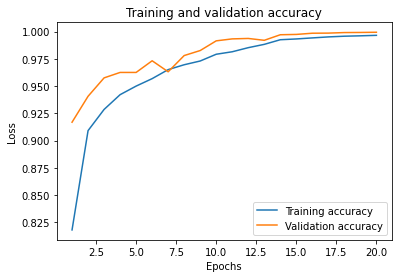

In [48]:
plt.title("Training and validation accuracy")
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


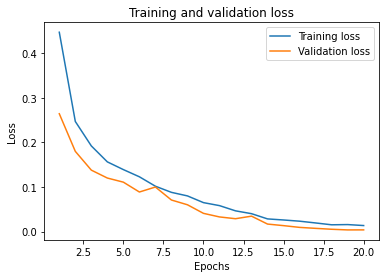

In [49]:
plt.title("Training and validation loss")
loss = plot_dict['loss']
val_loss = plot_dict['val_loss']
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [50]:
model.predict(X_test)

array([[0.00120483],
       [1.        ],
       [0.9999987 ],
       ...,
       [0.2854407 ],
       [0.00466818],
       [0.9897752 ]], dtype=float32)

In [51]:
from keras import regularizers
model1 = models.Sequential()
model1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [52]:
import keras
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [53]:
history2 = model.fit(X_train, y_train, epochs = 20, validation_data = (x_val, y_val), batch_size = 512)

Epoch 1/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0024 - acc: 0.9998 - val_loss: 0.0017 - val_acc: 0.9997
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0091 - acc: 0.9974 - val_loss: 0.0012 - val_acc: 0.9999
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0139 - acc: 0.9965 - val_loss: 9.1199e-04 - val_acc: 0.9999
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 7.8019e-04 - acc: 0.9999 - val_loss: 6.1067e-04 - val_acc: 0.9999
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0121 - acc: 0.9968 - val_loss: 4.7014e-04 - val_acc: 0.9999
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 4.2158e-04 - acc: 1.0000 - val_loss: 4.9576e-04 - val_acc: 1.0000
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0069 - acc: 0.9986 - val_loss: 1.9259e-04 - val_acc: 1.0000
Epoch 8/20
49/49 [==============================] - 1s 

In [54]:

plot_dict = history2.history
plot_dict #We can see loss, accuracy, val_loss, val_acc
accuracy = plot_dict['acc']
epochs = range(1,len(accuracy) + 1)
val_acc = plot_dict['val_acc']

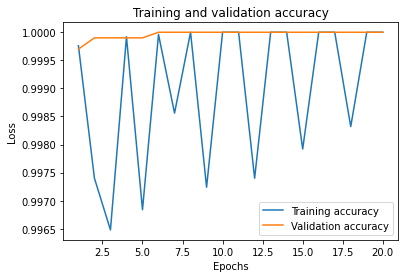

In [55]:
plt.title("Training and validation accuracy")
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

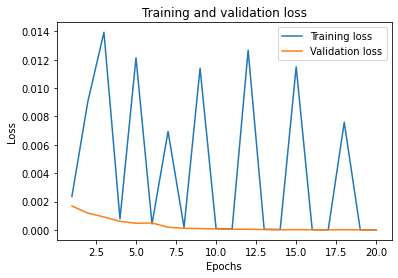

In [56]:
plt.title("Training and validation loss")
loss = plot_dict['loss']
val_loss = plot_dict['val_loss']
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [57]:
#The model seems to be doing well, apart from one point. We can implement early stopping, monitoring the loss to solve this problem

In [58]:
from keras import regularizers
model1 = models.Sequential()
model1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [69]:
import keras
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [70]:
history2 = model.fit(X_train, y_train, epochs = 20, callbacks = [callback], validation_data = (x_val, y_val), batch_size = 512)

Epoch 1/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0044 - acc: 0.9992 - val_loss: 1.3871e-06 - val_acc: 1.0000
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 1.5185e-06 - acc: 1.0000 - val_loss: 6.4741e-07 - val_acc: 1.0000
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 4.8537e-07 - acc: 1.0000 - val_loss: 2.6925e-07 - val_acc: 1.0000
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 2.1252e-07 - acc: 1.0000 - val_loss: 1.3741e-07 - val_acc: 1.0000
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 1.1181e-07 - acc: 1.0000 - val_loss: 6.7883e-08 - val_acc: 1.0000
Epoch 6/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0066 - acc: 0.9991 - val_loss: 1.0014e-07 - val_acc: 1.0000
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 8.6691e-08 - acc: 1.0000 - val_loss: 6.7102e-08 - val_acc: 1.0000
Epoch 8/20
49/49 [=================

In [71]:
plot_dict = history2.history
plot_dict #We can see loss, accuracy, val_loss, val_acc
accuracy = plot_dict['acc']
epochs = range(1,len(accuracy) + 1)
val_acc = plot_dict['val_acc']

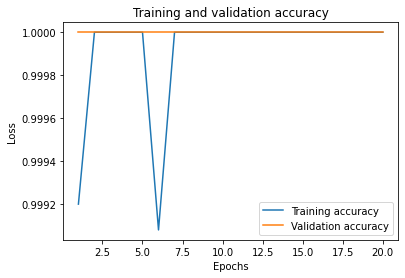

In [72]:
plt.title("Training and validation accuracy")
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

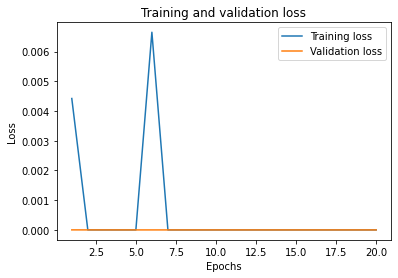

In [73]:
plt.title("Training and validation loss")
loss = plot_dict['loss']
val_loss = plot_dict['val_loss']
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#**Conclusion**
In this lab I got to explore hyperparameter tuning.
I explored and tuned different parts of the model, and used regularisation and finally Early stopping to get an accuracy of 1.000

However, the Testing accuracy being higher than the training accuracy left me confused. Upon checking the Keras FAQ page, I found an answer to this question

#Why is my training loss much higher than my testing loss?
A Keras model has two modes: training and testing. Regularization mechanisms, such as Dropout and L1/L2 weight regularization, are turned off at testing time. They are reflected in the training time loss but not in the test time loss.

Besides, the training loss that Keras displays is the average of the losses for each batch of training data, over the current epoch. Because your model is changing over time, the loss over the first batches of an epoch is generally higher than over the last batches. This can bring the epoch-wise average down. On the other hand, the testing loss for an epoch is computed using the model as it is at the end of the epoch, resulting in a lower loss.